In [130]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = load_digits()

In [183]:
X = df.data
y = df.target

In [184]:
k = 10

In [189]:
cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=k).mean()

0.8241247672253259

In [60]:
bc = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, n_jobs=-1)

In [61]:
cross_val_score(bc, X, y, cv=k).mean()

0.9209528243327127

In [19]:
d = X.shape[1]
BaggingClassifier?

Init signature:
BaggingClassifier(
    base_estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)
Docstring:     
A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If samples are drawn with
repl

In [190]:
bc = BaggingClassifier(DecisionTreeClassifier(random_state=0), n_estimators=100, n_jobs=-1, max_features=int(d ** .5))
cross_val_score(bc, X, y, cv=k).mean()

0.9248944754810676

In [191]:
bc = BaggingClassifier(DecisionTreeClassifier(max_features=int(d ** .5), random_state=0), n_estimators=100, n_jobs=-1)
cross_val_score(bc, X, y, cv=k).mean()

0.9482464307883302

In [34]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The nu

In [192]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1, max_features=int(d ** .5))
cross_val_score(rfc, X, y, cv=k).mean()

0.9476939788950961

In [67]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list o

In [116]:
list(range(10, 201, 50))

[10, 60, 110, 160]

In [103]:
list(range(2, int((d ** .5) + 4), 2))

[2, 4, 6, 8, 10]

In [106]:
list(range(2, 60, 15))

[2, 17, 32, 47]

In [199]:
params = {
    "n_estimators": range(10, 201, 50),
    "max_features": range(2, int((d ** .5) + 4), 2),
    "max_depth": range(1, 5, 1)
}

In [201]:
gsc.best_params_

{'max_depth': 4, 'max_features': 4, 'n_estimators': 160}

In [200]:
gsc = GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1, cv=k, param_grid=params).fit(X, y)

In [128]:
def best_nest(list_, name, where='params'):
    return np.array([x[name] for x in list_["params"] if x['n_estimators'] == 160])

In [139]:
len(gsc.cv_results_['mean_test_score']), len(gsc.cv_results_['params'])

(80, 80)

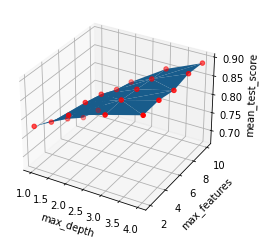

In [203]:
# show on best n_est:
x_ = best_nest(gsc.cv_results_, "max_depth")
y_ = best_nest(gsc.cv_results_, "max_features")
ax = plt.axes(projection='3d')
z_ = np.array([m for p, m in zip(gsc.cv_results_["params"], gsc.cv_results_["mean_test_score"]) if p['n_estimators'] == 160])
ax.plot_trisurf(x_, y_, z_);
ax.scatter(x_, y_, z_, color="red");
ax.set_xlabel('max_depth')
ax.set_ylabel('max_features')
ax.set_zlabel('mean_test_score');

In [208]:

cross_val_score(RandomForestClassifier(random_state=0, n_estimators=500, n_jobs=-1), X, y, cv=k).mean()

0.950471756672874

In [209]:
RandomForestClassifier(random_state=0, n_estimators=500, n_jobs=-1, oob_score=True).fit(X, y).oob_score_

0.9805230940456316